In [60]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [61]:
mnist = tf.keras.datasets.cifar10
(X_train,  Y_train), (X_test, Y_test) = mnist.load_data()

In [62]:
print(X_train.shape)

(50000, 32, 32, 3)


In [63]:
if (X_train.ndim < 4):
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)


In [64]:
input_shape = (X_train[0].shape)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print(input_shape)

(32, 32, 3)


In [65]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [66]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Resizing(28, 28, interpolation="bilinear", input_shape=input_shape))
model.add (tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh' ) )
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add (tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh' )) 
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120,activation='tanh'))
model.add(tf.keras.layers.Dense(84,activation='tanh'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))



model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, weight_decay=None), loss='categorical_crossentropy', metrics=['accuracy'])


In [67]:
model.fit(X_train, Y_train, epochs=50, batch_size=128, verbose=2, validation_split=0.175)

Epoch 1/50
323/323 - 21s - loss: 1.9592 - accuracy: 0.2956 - val_loss: 1.9032 - val_accuracy: 0.3113 - 21s/epoch - 65ms/step
Epoch 2/50
323/323 - 20s - loss: 1.7223 - accuracy: 0.3910 - val_loss: 1.7426 - val_accuracy: 0.3697 - 20s/epoch - 62ms/step
Epoch 3/50
323/323 - 20s - loss: 1.6093 - accuracy: 0.4302 - val_loss: 1.6328 - val_accuracy: 0.4159 - 20s/epoch - 61ms/step
Epoch 4/50
323/323 - 20s - loss: 1.5238 - accuracy: 0.4618 - val_loss: 1.5419 - val_accuracy: 0.4553 - 20s/epoch - 61ms/step
Epoch 5/50
323/323 - 18s - loss: 1.4616 - accuracy: 0.4824 - val_loss: 1.6106 - val_accuracy: 0.4246 - 18s/epoch - 54ms/step
Epoch 6/50
323/323 - 20s - loss: 1.4088 - accuracy: 0.5010 - val_loss: 1.5247 - val_accuracy: 0.4735 - 20s/epoch - 62ms/step
Epoch 7/50
323/323 - 19s - loss: 1.3789 - accuracy: 0.5111 - val_loss: 1.4772 - val_accuracy: 0.4694 - 19s/epoch - 59ms/step
Epoch 8/50
323/323 - 17s - loss: 1.3403 - accuracy: 0.5231 - val_loss: 1.4281 - val_accuracy: 0.4919 - 17s/epoch - 54ms/step


In [68]:
arr = ['airplane',
	'automobile',
 	'bird',
	'cat',
	'deer',
	'dog',
	'frog',
	'horse',
	'ship', 
    'truck']

1/1 [==============================] - 0s 76ms/step


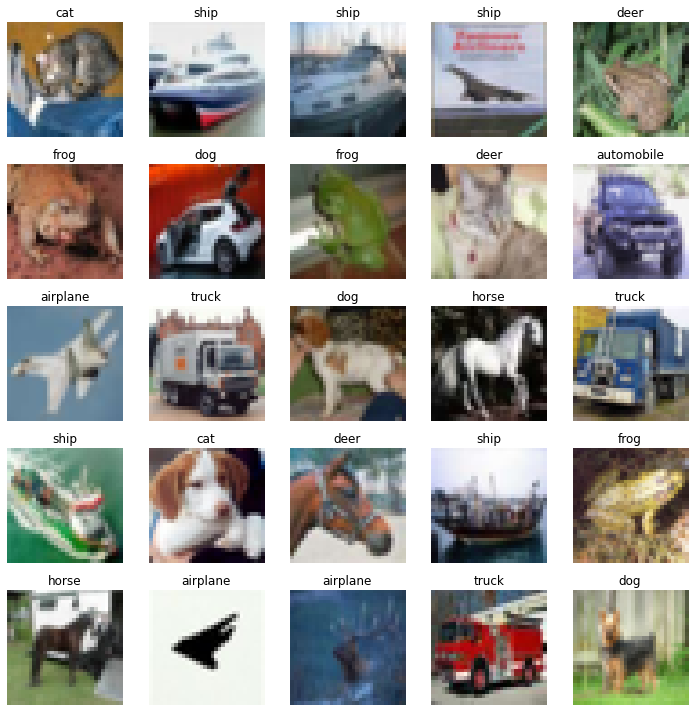

In [69]:
predictions = model.predict(X_test[0:25])
predicted_labels = np.argmax(predictions, axis=1)

# Plotting the images with predicted labels
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    # Plot the image
    ax.imshow(X_test[i])
    ax.axis('off')
    
    # Write the predicted label on top of the image
    ax.set_title(str(arr[predicted_labels[i]]))
    
plt.tight_layout()
plt.show()